In [4]:
# Dataframe manage krna easy rehta hai
import pandas as pd

# Array management
import numpy as np

#Decompress the file, we were having problems in pd.read_json
import gzip

# Graph wgera
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline

# Time
from datetime import datetime

import warnings
from scipy import stats
warnings.filterwarnings('ignore')

# bade database ke liye use hota hai
import dask.bag as db

# Ek ek kar funtion uthayega aur value dalega , sidha read krne main null de rha tha
def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

#Reviews wala database
review_df = getDF('/users/sanjeev/Downloads/Minor/Databases/reviews_Electronics_5.json.gz')
review_df=review_df.rename(columns={'overall' : 'Rating'})

print("Total data:", str(review_df.shape))
review_df.head()

Total data: (1689188, 9)


,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:
# metadata wala database
dfmeta= getDF('/users/sanjeev/Downloads/Minor/Databases/meta_Electronics.json.gz')
dfmeta.head()

,asin,imUrl,description,categories,title,price,salesRank,related,brand
0,0132793040,http://ecx.images-amazon.com/images/I/31JIPhp%...,The Kelby Training DVD Mastering Blend Modes i...,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Mastering Blend Modes in A...,NaN,NaN,NaN,NaN
1,0321732944,http://ecx.images-amazon.com/images/I/31uogm6Y...,NaN,"[[Electronics, Computers & Accessories, Cables...",Kelby Training DVD: Adobe Photoshop CS5 Crash ...,NaN,NaN,NaN,NaN
2,0439886341,http://ecx.images-amazon.com/images/I/51k0qa8f...,Digital Organizer and Messenger,"[[Electronics, Computers & Accessories, PDAs, ...",Digital Organizer and Messenger,8.15,{'Electronics': 144944},"{'also_viewed': ['0545016266', 'B009ECM8QY', '...",NaN
3,0511189877,http://ecx.images-amazon.com/images/I/41HaAhbv...,The CLIKR-5 UR5U-8780L remote control is desig...,"[[Electronics, Accessories & Supplies, Audio &...",CLIKR-5 Time Warner Cable Remote Control UR5U-...,23.36,NaN,"{'also_viewed': ['B001KC08A4', 'B00KUL8O0W', '...",NaN
4,0528881469,http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [6]:
dfmeta.shape

(498196, 9)

In [7]:
product_reviews=pd.merge(review_df,dfmeta,on='asin',how='left')
product_reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,1370131200,"06 2, 2013",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1.0,Very Disappointed,1290643200,"11 25, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3.0,1st impression,1283990400,"09 9, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2.0,"Great grafics, POOR GPS",1290556800,"11 24, 2010",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1.0,"Major issues, only excuses for support",1317254400,"09 29, 2011",http://ecx.images-amazon.com/images/I/51FnRkJq...,"Like its award-winning predecessor, the Intell...","[[Electronics, GPS & Navigation, Vehicle GPS, ...",Rand McNally 528881469 7-inch Intelliroute TND...,299.99,NaN,"{'also_viewed': ['B006ZOI9OY', 'B00C7FKT2A', '...",NaN


In [8]:
# rows aur coloums aa jaate hai
product_reviews.shape

(1689188, 17)

In [9]:
# jo coloumn hai wo kis type ke hai
product_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689188 entries, 0 to 1689187
Data columns (total 17 columns):
reviewerID        1689188 non-null object
asin              1689188 non-null object
reviewerName      1664458 non-null object
helpful           1689188 non-null object
reviewText        1689188 non-null object
Rating            1689188 non-null float64
summary           1689188 non-null object
unixReviewTime    1689188 non-null int64
reviewTime        1689188 non-null object
imUrl             1687975 non-null object
description       1655511 non-null object
categories        1689188 non-null object
title             1643686 non-null object
price             1639882 non-null float64
salesRank         810070 non-null object
related           1662142 non-null object
brand             954251 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 232.0+ MB


In [10]:
#Null values find kar rhe hai badme hta denge
product_reviews.isnull().sum()

reviewerID             0
asin                   0
reviewerName       24730
helpful                0
reviewText             0
Rating                 0
summary                0
unixReviewTime         0
reviewTime             0
imUrl               1213
description        33677
categories             0
title              45502
price              49306
salesRank         879118
related            27046
brand             734937
dtype: int64

In [11]:
#Data Wrangling

# Customize krdenge jo coloumns useless hai inhe hta denge

In [12]:
product_reviews2=product_reviews.dropna(subset=['title'])

In [13]:
product_reviews2.to_csv('/users/sanjeev/Downloads/Minor/Databases/product_reviews2.csv',sep=',', encoding='utf-8', index= False)
product_reviews2.shape

(1643686, 17)

In [14]:
product_reviews2.title.unique()

array(['Rand McNally 528881469 7-inch Intelliroute TND 700 Truck GPS',
       'Barnes &amp; Noble HDTV Adapter Kit for NOOK HD and NOOK HD+',
       'Barnes &amp; Noble OV/HB-ADP Universal Power Kit', ...,
       'Sabrent Wifi Audio Receiver (Supports DLNA and AirPlay) for Home Stereo, Portable Speakers (WF-RADU)',
       'NEW! Creative Sound Blaster Roar: Portable NFC Bluetooth Wireless Speaker with aptX/AAC. 5 Drivers, Built-in Subwoofer, Incredibly Powerful. Amazing Price of $149.99!',
       'Brainwavz S5 In Ear Headphones'], dtype=object)

In [15]:
#Extracting Headphones From Title Coloumn
#Jinke bhi title main ye 4 keywords hai wo select krlenge

In [16]:
product_reviews_hp=product_reviews2[product_reviews2["title"].str.contains("headphones|headphone|Headphones|Headphone")]

In [17]:
product_reviews_hp.shape

(64305, 17)

In [18]:
#checking for null values

product_reviews_hp.isnull().sum()

reviewerID            0
asin                  0
reviewerName        783
helpful               0
reviewText            0
Rating                0
summary               0
unixReviewTime        0
reviewTime            0
imUrl                 0
description        1431
categories            0
title                 0
price               750
salesRank         42676
related            1009
brand             22699
dtype: int64

In [19]:
#seeing the headphone database with missing brand values
product_reviews_hp[product_reviews_hp['brand'].isnull()]

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,unixReviewTime,reviewTime,imUrl,description,categories,title,price,salesRank,related,brand
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,"[11, 11]",I've been using these for over a year now. Ba...,4.0,"Good sound, Good Noise Cancelling, Good for ai...",1104796800,"01 4, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""","[12, 13]",I will admit that I recently gave up my Sony H...,5.0,Best Noise Cancelling Headphones,1106524800,"01 24, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,"[8, 9]",I bought these thinking they were the ticket t...,3.0,Not what I'd hoped for.,1096934400,"10 5, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""","[0, 0]",I've owned these for years. I used to fly two ...,5.0,"The ""Get Smart"" Cone of Silence has finally be...",1093305600,"08 24, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,"[10, 12]",I have used the headphones for 2 years -- they...,5.0,Great product,1117929600,"06 5, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,NaN,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""","[1, 1]",Burned these in before listening to them for a...,5.0,Boom -- Pop -- Pow. These deliver.,1405555200,"07 17, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,NaN,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",NaN
1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""","[0, 0]",Some people like DJ style headphones or earbud...,5.0,"Thin and light, without compromising on sound ...",1405382400,"07 15, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,NaN,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",NaN
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,"[0, 0]",I&#8217;m a big fan of the Brainwavz S1 (actua...,5.0,Same form factor and durability as the S1 with...,1405555200,"07 17, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,NaN,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",NaN
1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,"[0, 0]","I've used theBrainwavz S1 In Ear Headphones, a...",5.0,Superb audio quality in a very comfortable set...,1405641600,"07 18, 2014",http://ecx.image

In [20]:
# Filling Null Values in brand from first word in title
# zyadatar product ke starting main title hota hai toh missing brand main wo daal denge

product_reviews_hp.loc[product_reviews_hp.brand.isnull(),'brand'] = product_reviews_hp.title.str.split().str.get(0)

#pehla space aate hi usse pehle ka le lega i.e  first word

In [21]:
#checking if any item is there with missing brand value
# 0 aana chahiye 

product_reviews_hp.isnull().sum()

reviewerID            0
asin                  0
reviewerName        783
helpful               0
reviewText            0
Rating                0
summary               0
unixReviewTime        0
reviewTime            0
imUrl                 0
description        1431
categories            0
title                 0
price               750
salesRank         42676
related            1009
brand                 0
dtype: int64

In [22]:
#dropping salesrank from dataset
#kisi kaam ki nhi hai

product_reviews_hp2=product_reviews_hp.drop('salesRank',axis=1)
#axis = 1 matlab y-axis i.e coloumn  , 0 matlab x-axis i.e row 

In [23]:
#Dropping Null values Coloumns 

product_reviews_hp3=product_reviews_hp2.dropna(subset=['reviewerName','description','price','related'])

In [24]:
#Final Checking for missing values
# 0 hi aayegi kyunki null wali drop krdi

product_reviews_hp3.isnull().sum()

reviewerID        0
asin              0
reviewerName      0
helpful           0
reviewText        0
Rating            0
summary           0
unixReviewTime    0
reviewTime        0
imUrl             0
description       0
categories        0
title             0
price             0
related           0
brand             0
dtype: int64

In [25]:
product_reviews_hp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61133 entries, 1260 to 1689187
Data columns (total 16 columns):
reviewerID        61133 non-null object
asin              61133 non-null object
reviewerName      61133 non-null object
helpful           61133 non-null object
reviewText        61133 non-null object
Rating            61133 non-null float64
summary           61133 non-null object
unixReviewTime    61133 non-null int64
reviewTime        61133 non-null object
imUrl             61133 non-null object
description       61133 non-null object
categories        61133 non-null object
title             61133 non-null object
price             61133 non-null float64
related           61133 non-null object
brand             61133 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 7.9+ MB


In [26]:
#Creating a csv file of this dataset
#csv file create hogyi required dataset ki
product_reviews_hp3.to_csv('/users/sanjeev/Downloads/Minor/Databases/product_reviews_hp3.csv',sep=',', encoding='utf-8', index= False)

In [27]:
#concatenating reviewtext and summary

product_reviews_hp3['review_text']=product_reviews_hp3[['summary','reviewText']].apply(lambda x:" ".join(str(y) for y in x if str(y) !='nan'), axis=1)

In [28]:
#dropping reviewText and summary
#unko milake hmne ek nya review_text coloumn bnaliya hai

product_reviews_hp4= product_reviews_hp3.drop(['reviewText','summary'], axis=1)
product_reviews_hp4.head()

,reviewerID,asin,reviewerName,helpful,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,related,brand,review_text
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,"[11, 11]",4.0,1104796800,"01 4, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai..."
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""","[12, 13]",5.0,1106524800,"01 24, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,"[8, 9]",3.0,1096934400,"10 5, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""","[0, 0]",5.0,1093305600,"08 24, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be..."
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,"[10, 12]",5.0,1117929600,"06 5, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...


In [29]:
#checking any random review_text

product_reviews_hp4['review_text'][1263]

'The "Get Smart" Cone of Silence has finally been perfected. I\'ve owned these for years. I used to fly two round trips a week, and I wore these constantly, whether or not there was any reason to (in flight entertainment, a CD player).The first benefit is that the noise reduction made speech more audible. I could hear the person in the next seat better, and, in fact, I found that I could eavesdrop on people a row or two away, since the noise that would normally have masked their conversation was masked, but the speech came through.The loud, constant background sound in airplanes is very draining. I was more likely to be able to nap with these on, and I was more likely to be able to concentrate on reading with less background noise.Don\'t get a unit that simply insulates the sound - you might as well use earplugs or sealing earbuds. There is nothing wrong with that solution, it is just that the solution of generated countersound (exactly out of phase, exactly the right amount and freque

In [30]:
# splitting the helpful coloumn into negative and positive feedback

#feedback ko list main store krenge

list_positive = []
list_negative = []

for help in product_reviews_hp4['helpful']:
    list_positive.append(help[0])
    list_negative.append(help[1]-help[0])
    
#help main values hai 0 wali jinhe helpful lga aur 1 wali total , toh negative help[1]-help[0]

#Positive Feedback (Supporting reviewers's idea and find it useful)
product_reviews_hp4['pos_feedback']=list_positive

#Negative Feedback ( Finding reviwers's idea useless and not supporting it)
product_reviews_hp4['neg_feedback']=list_negative

#drop 'helpful' coloumn
# helpful se hmne pos and neg bna liya ab uska koi kaam nhi hai
product_reviews_hp4=product_reviews_hp4.drop('helpful', axis=1)
product_reviews_hp4.head()

,reviewerID,asin,reviewerName,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4.0,1104796800,"01 4, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5.0,1106524800,"01 24, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3.0,1096934400,"10 5, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5.0,1093305600,"08 24, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5.0,1117929600,"06 5, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2


In [31]:
# classifying rating as good
# 3 se zyada matlab acha wrna bekar

good_rate= len(product_reviews_hp4[product_reviews_hp4['Rating'] >=3])
bad_rate= len(product_reviews_hp4[product_reviews_hp4['Rating'] < 3])

#printing rates and their total numbers
print('Good ratings : {} reviews for Headphones products'.format(good_rate))
print('Bad ratings : {} reviews for Headphones products'.format(bad_rate))

Good ratings : 52810 reviews for Headphones products
Bad ratings : 8323 reviews for Headphones products


In [32]:
# Applying the new classification to the ratings coloumn

product_reviews_hp4['rating_class']=product_reviews_hp4['Rating'].apply(lambda x: 'bad' if x<3 else'good')
product_reviews_hp4.head()

,reviewerID,asin,reviewerName,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4.0,1104796800,"01 4, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5.0,1106524800,"01 24, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3.0,1096934400,"10 5, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5.0,1093305600,"08 24, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5.0,1117929600,"06 5, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good


In [33]:
#applying the helpfulness ratio
#helpfulness ratio matlab postive / total reviews about a thing being helpful maximum 1 ho skta hai 

product_reviews_hp4['help_prop'] = product_reviews_hp4.pos_feedback.div((product_reviews_hp4.pos_feedback+product_reviews_hp4.neg_feedback), axis=0)
product_reviews_hp4

,reviewerID,asin,reviewerName,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class,help_prop
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4.0,1104796800,"01 4, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5.0,1106524800,"01 24, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3.0,1096934400,"10 5, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5.0,1093305600,"08 24, 2004",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,NaN
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5.0,1117929600,"06 5, 2005",http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""",5.0,1405555200,"07 17, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,Boom -- Pop -- Pow. These deliver. Burned the...,1,0,good,1.000000
1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""",5.0,1405382400,"07 15, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,"Thin and light, without compromising on sound ...",0,0,good,NaN
1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,5.0,1405555200,"07 17, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,Same form factor and durability as the S1 with...,0,0,good,NaN
1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,5.0,1405641600,"07 18, 2014",http://ecx.images-amazon.com/images/I/41%2BcVY...,The Brainwavz S5 are dynamic driver based earp...,"[[Electronics, Accessories & Supplies, Audio &...",Brainwavz S5 In Ear Headphones,99.50,"{'also_viewed': ['B00G4V0QSK', 'B00G4UQ6U8', '...",Brainwavz,Superb audio quality in a very comfortable set...,0,0,good,NaN


In [34]:
#filling helpfullness ratio Nan value with zero
# jha par bhi helpfulness ratio avalaible nhi hai wha 0 krdenge
product_reviews_hp4['help_prop'].fillna(0,inplace=True)
#inplace = True matlab jo dataset main changes kiya hai wo permanent hai aur replect honge

In [35]:
#checking duplicates based on 'asin','reviewName' and 'unixReviewTime' coloumns 

product_reviews_hp4[product_reviews_hp4.duplicated(['reviewerName','unixReviewTime','asin'],keep=False)]

,reviewerID,asin,reviewerName,Rating,unixReviewTime,reviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class,help_prop
601823,A23V9XZWUFEWWX,B002HWJT1A,Paul,5.0,1356566400,"12 27, 2012",http://ecx.images-amazon.com/images/I/41RgSp8Y...,,"[[Electronics, Accessories & Supplies, Audio &...",Audio-Technica ATH-ANC7B QuietPoint Active Noi...,152.99,"{'also_bought': ['B000067RC4', 'B0083J7EUO', '...",Audio-Technica,excellent noise canceling Excellent sound qual...,0,0,good,0.0
601824,A2RMTTDT5Z6G86,B002HWJT1A,Paul,5.0,1356566400,"12 27, 2012",http://ecx.images-amazon.com/images/I/41RgSp8Y...,,"[[Electronics, Accessories & Supplies, Audio &...",Audio-Technica ATH-ANC7B QuietPoint Active Noi...,152.99,"{'also_bought': ['B000067RC4', 'B0083J7EUO', '...",Audio-Technica,Excellent value for headphones with active-noi...,0,0,good,0.0
760353,AM67VZ3Z4HUTR,B003ELYQGG,Amazon Customer,5.0,1380672000,"10 2, 2013",http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,Panasonic RPHJE120S In-Ear Headphones Fantasti...,0,0,good,0.0
760357,APKFIZH7HLZ6X,B003ELYQGG,Amazon Customer,1.0,1380672000,"10 2, 2013",http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,Flat. Tinny. No Bass I can't recommend these a...,0,0,bad,0.0
760617,A1VA4Z4B7Y74KY,B003ELYQGG,Brad,3.0,1404777600,"07 8, 2014",http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,Three Stars Cheap,0,0,good,0.0
760620,A2WOPG3K518RN6,B003ELYQGG,Brad,5.0,1404777600,"07 8, 2014",http://ecx.images-amazon.com/images/I/41BqKcg6...,Panasonic In-Ear Headphone Comparison ChartSeries,"[[Electronics, Accessories & Supplies, Audio &...","Panasonic RPHJE120D In-Ear Headphone, Orange",7.04,"{'also_bought': ['B00JKC3M5O', 'B007CT7TAQ', '...",Panasonic,"There are better sounding earphones, but you'l...",0,0,good,0.0
1670869,A3US4KS743CHAR,B00GMFYM8I,Amazon Customer,5.0,1398038400,"04 21, 2014",http://ecx.images-amazon.com/images/I/41-0kBLi...,"""Here's The Super Simple Way To Add The Latest...","[[Electronics, Computers & Accessories, Networ...",Mediastic USB Bluetooth Adapter - Latest V4.0 ...,14.95,"{'also_bought': ['B00GS7SKQK', 'B004YDTIP2', '...",Mediastic,Great product I have an older desktop computer...,0,0,good,0.0
1670870,A27UJPP9SQWGDO,B00GMFYM8I,Amazon Customer,4.0,1398038400,"04 21, 2014",http://ecx.images-amazon.com/images/I/41-0kBLi...,"""Here's The Super Simple Way To Add The Latest...","[[Electronics, Computers & Accessories, Networ...",Mediastic USB Bluetooth Adapter - Latest V4.0 ...,14.95,"{'also_bought': ['B00GS7SKQK', 'B004YDTIP2', '...",Mediastic,Great product for the price This was a fast an...,0,0,good,0.0


In [36]:
product_reviews_hp4.shape

(61133, 18)

In [37]:
#Drop duplicate 'reviewName' and 'unixReviewTime' coloumns

product_reviews_hp4=product_reviews_hp4.drop_duplicates(['asin','reviewerName','unixReviewTime'], keep = 'first')
#keep = first matlab jab duplicates mile toh uska pehla instance rakh lo baki drop kr do

In [38]:
product_reviews_hp4.shape

(61129, 18)

In [39]:
#convert time object to datetime and create a new coloumn name 'time'

product_reviews_hp4['time'] = product_reviews_hp4.reviewTime.str.replace(',', "")
#comma aur space ki jgah ache se date month year main kr rhe hai 

product_reviews_hp4['time'] = pd.to_datetime(product_reviews_hp4['time'], format = '%m %d %Y')
#pandas ki property hoti hai jisse ham time ko kisi specified type main kr skte hai

#drop redundant 'reviewTime' coloumn 
product_reviews_hp4=product_reviews_hp4.drop('reviewTime', axis =1)
product_reviews_hp4.head()

,reviewerID,asin,reviewerName,Rating,unixReviewTime,imUrl,description,categories,title,price,related,brand,review_text,pos_feedback,neg_feedback,rating_class,help_prop,time
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4.0,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000,2005-01-04
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5.0,1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077,2005-01-24
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3.0,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889,2004-10-05
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5.0,1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,0.000000,2004-08-24
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5.0,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333,2005-06-05


In [40]:
product_reviews_hp4.columns= ['reviewer_id','product_id','reviewer_name','rating','unix_review_time','url','description','categories','product_title','price','related','brand_name','review_text','pos_feedback','neg_feedback','rating_class','help_prop','review_time']

In [41]:
#Sample Observation 
product_reviews_hp4.head()

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,url,description,categories,product_title,price,related,brand_name,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4.0,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000,2005-01-04
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5.0,1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077,2005-01-24
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3.0,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889,2004-10-05
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5.0,1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,0.000000,2004-08-24
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5.0,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333,2005-06-05


In [42]:
#STATISTICS

# Total reviews
total = len(product_reviews_hp4)
print ("Number of reviews: ",total)
print ()

# Unique reviewers
print ("Number of unique reviewers: ",len(product_reviews_hp4.reviewer_id.unique()))
reviewer_prop = float(len(product_reviews_hp4.reviewer_id.unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))
print ()

#Unique products
print ("Number of unique products: ", len(product_reviews_hp4.product_id.unique()))
product_prop = float(len(product_reviews_hp4.product_id.unique())/total)
print ("Prop of unique products: ",round(product_prop,3))
print ()

#Average Rating
print ("Average rating score: ",round(product_reviews_hp4.rating.mean(),3))

# Average helpfullness ratio
print ("Average helpfull ratio score: ",round(product_reviews_hp4.help_prop.mean(),3))

Number of reviews:  61129

Number of unique reviewers:  42062
Prop of unique reviewers:  0.688

Number of unique products:  1878
Prop of unique products:  0.031

Average rating score:  4.056
Average helpfull ratio score:  0.351


In [43]:
product_reviews_hp4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61129 entries, 1260 to 1689187
Data columns (total 18 columns):
reviewer_id         61129 non-null object
product_id          61129 non-null object
reviewer_name       61129 non-null object
rating              61129 non-null float64
unix_review_time    61129 non-null int64
url                 61129 non-null object
description         61129 non-null object
categories          61129 non-null object
product_title       61129 non-null object
price               61129 non-null float64
related             61129 non-null object
brand_name          61129 non-null object
review_text         61129 non-null object
pos_feedback        61129 non-null int64
neg_feedback        61129 non-null int64
rating_class        61129 non-null object
help_prop           61129 non-null float64
review_time         61129 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(11)
memory usage: 8.9+ MB


In [44]:
#Statistic summary of numeric variables
product_reviews_hp4[['rating','pos_feedback','neg_feedback','help_prop']].describe()
#describe se mean min max wgera calculate krdeta hai

,rating,pos_feedback,neg_feedback,help_prop
count,61129.000000,61129.000000,61129.000000,61129.000000
mean,4.056438,3.082269,0.641709,0.350887
std,1.217506,31.516073,2.777990,0.442493
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.947368
max,5.000000,3800.000000,144.000000,1.000000


Text(0, 0.5, 'Number of Reviews')

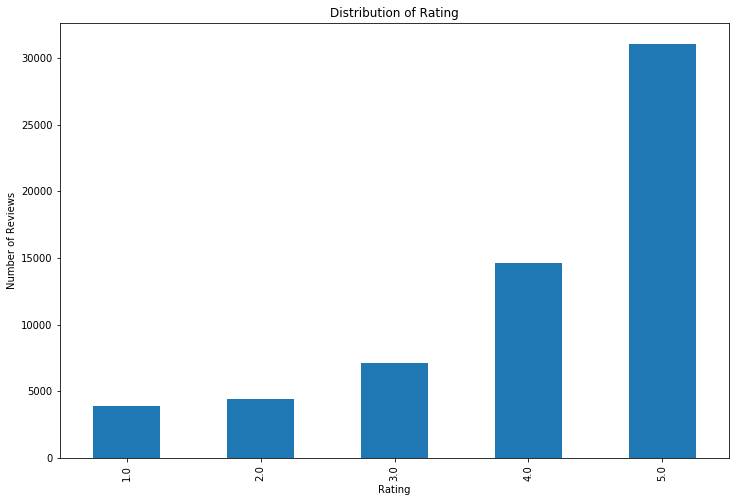

In [45]:
#PLOT DISTRIBUTION OF RATING 

plt.figure(figsize=(12,8))
#12 x-axis aur 8 y-axis  graph ka size hai

product_reviews_hp4['rating'].value_counts().sort_index().plot(kind='bar')
#Ratings se sort krke bar graph bnanna hai

plt.title('Distribution of Rating')
#graph ka title

plt.xlabel('Rating')
#x-axis ka title

plt.ylabel('Number of Reviews')
#y-axis ka title

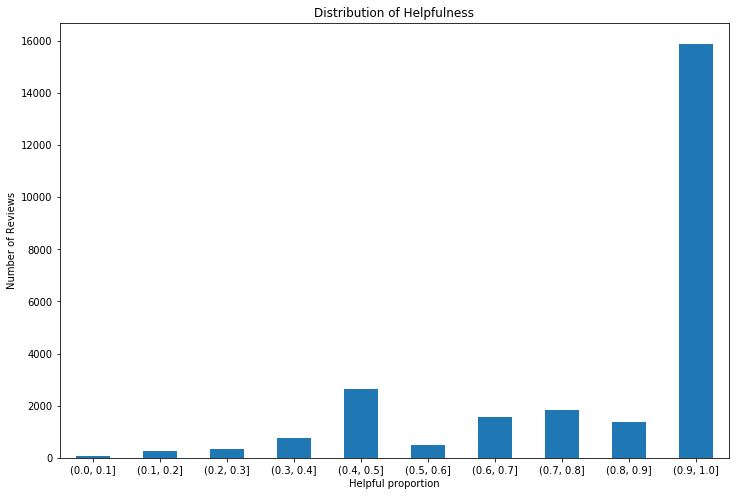

In [46]:
#DISTRIBUTION OF HELPFULNESS

plt.figure(figsize=(12,8))

cutoff = np.array([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
#x-axis ki values define kr rhe hai

Dist_help = product_reviews_hp4.groupby([pd.cut(product_reviews_hp4['help_prop'], bins = cutoff)]).size()
#bins = cutoff matlab values range main hongi jaise 0-0.1  01.-0.2  wgera

Dist_help.plot(kind='bar')

plt.title("Distribution of Helpfulness")
plt.xlabel("Helpful proportion")
plt.ylabel("Number of Reviews")

plt.xticks(rotation=0)
#jo neeche dandi nikal rakhi hai 
plt.show()

In [47]:
#DISTRIBUTION OF RATING SCORE

class_counts = product_reviews_hp4.groupby('rating').size()
class_counts
#classifying no.of products by rating

rating
1.0     3870
2.0     4452
3.0     7102
4.0    14639
5.0    31066
dtype: int64

In [48]:
# Customer totals for each rating class
product_reviews_hp4['rating_class'].value_counts()

good    52807
bad      8322
Name: rating_class, dtype: int64

In [49]:
# Print the number of positive feedback
pos = len(product_reviews_hp4[product_reviews_hp4['pos_feedback'] > 0])
print('Number of positive feedbacks: {}'.format(pos))
      
# Print the number of negative feedback
neg = len(product_reviews_hp4[product_reviews_hp4['neg_feedback'] > 0])      
print('Number of negative feedbacks: {}'.format(neg))

Number of positive feedbacks: 25222
Number of negative feedbacks: 14202


In [50]:
product_reviews_hp5 = product_reviews_hp4[product_reviews_hp4['pos_feedback'] == 0]
product_reviews_hp6 = product_reviews_hp5[product_reviews_hp5['neg_feedback']==0]
product_reviews_hp6.shape

(32049, 18)

In [51]:
# Statistics of non-numeric variables

# Number of unique customers
print('\nNumber of unique customers : {}'.format(len(product_reviews_hp4['reviewer_id'].unique())))
      
# Number of unique products
print('\nNumber of unique products : {}'.format(len(product_reviews_hp4['product_id'].unique())))
      
# Review number per unique customer
print('\nReview per customer: {}'.format((len(product_reviews_hp4)/len(product_reviews_hp4['reviewer_id'].unique()))))      

# Review number per unique product 
print('\nReview per product: {}'.format((len(product_reviews_hp4)/len(product_reviews_hp4['product_id'].unique()))))


Number of unique customers : 42062

Number of unique products : 1878

Review per customer: 1.4533070229660976

Review per product: 32.550053248136315


In [52]:
product_reviews_hp4.to_csv('/users/sanjeev/Downloads/Minor/Databases/product_reviews_hp4.csv',sep=',', encoding='utf-8', index= False)

In [53]:
product_reviews_hp4.head()

,reviewer_id,product_id,reviewer_name,rating,unix_review_time,url,description,categories,product_title,price,related,brand_name,review_text,pos_feedback,neg_feedback,rating_class,help_prop,review_time
1260,A3UFCX1AE4TKZE,B00000DMA3,Ben,4.0,1104796800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"Good sound, Good Noise Cancelling, Good for ai...",11,0,good,1.000000,2005-01-04
1261,A33FS5H3CPDR6D,B00000DMA3,"Miguel Ali ""Film Director & Political Pundit""",5.0,1106524800,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Best Noise Cancelling Headphones I will admit ...,12,1,good,0.923077,2005-01-24
1262,A1Q5M90ZZEEAL1,B00000DMA3,Niall O'Driscoll,3.0,1096934400,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Not what I'd hoped for. I bought these thinkin...,8,1,good,0.888889,2004-10-05
1263,A1N03V52IRZ5PR,B00000DMA3,"N. J. Simicich ""Gadget Geek""",5.0,1093305600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,"The ""Get Smart"" Cone of Silence has finally be...",0,0,good,0.000000,2004-08-24
1264,A1W5G9ITZQ64TN,B00000DMA3,Stephen McLin,5.0,1117929600,http://ecx.images-amazon.com/images/I/5156BXCV...,"Retreat to a world of music, sleep on airplane...","[[Electronics, Accessories & Supplies, Audio &...",Sony MDR-NC20 Noise Canceling Headphones with ...,109.94,"{'also_viewed': ['B000U07C1U', 'B001EYU3L2', '...",Sony,Great product I have used the headphones for 2...,10,2,good,0.833333,2005-06-05
